In [1]:
import pandas as pd
import numpy as np

In [169]:
train_df = pd.read_csv("D:/Academic/lap-trinh/Project/PycharmProject/MachineLearningProject/Model/TitanicPredition/train.csv")

- first choice we can see all information about data in file titanic_train.html
- review data by file


In [ ]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(train_df, title = 'titanic_train_report')
# profile.to_file('titanic_train.html')

# review Data

- second choice we can see by creating
- review data by creating

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The results show that the first and second columns are only used for passenger identification. So we can ignore this and merge them together. 

In [156]:
train_df.drop('PassengerId', axis=1, inplace=True)
train_df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


similar to test_df

In [170]:
test_df = pd.read_csv("D:/Academic/lap-trinh/Project/PycharmProject/MachineLearningProject/Model/TitanicPredition/test.csv", index_col='PassengerId')
test_df.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


According to this data column like ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch'] the data seems to be Categorical type so we need to change this for improve performance of model

In [171]:
# because test_df don't have Survived column so we do this for train data
train_df['Survived'] = train_df['Survived'].astype('category')
# other have in both data
features = ['Pclass', 'Sex', 'SibSp', 'Parch']
def convert_data(df, features):
    for ft in features:
        df[ft] = df[ft].astype('category')
convert_data(train_df, features)
convert_data(test_df, features)

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(5), float64(2), object(4)
memory usage: 47.3+ KB


Distribution of Categorical feature 

In [16]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch
count,891,891,891,891,891
unique,2,3,2,7,7
top,0,3,male,0,0
freq,549,491,577,608,678


# Exploratory Data

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
train_df['Survived'].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


Only 38% survived so the training data is data imbalanced but not that important to use data balancing tools

# sex

In [20]:
train_df['Sex'].value_counts().to_frame()

,count
Sex,
male,577
female,314


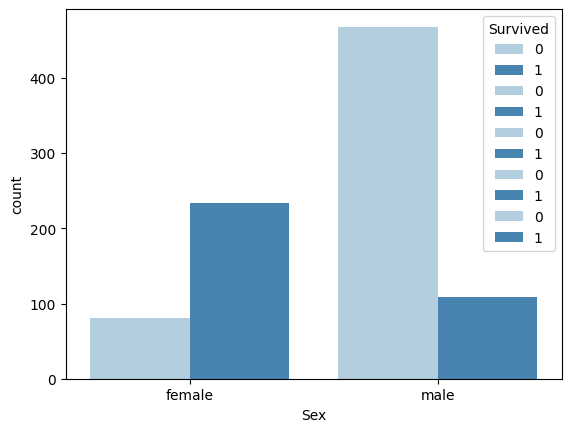

In [27]:
sns.countplot(data=train_df, x = 'Sex', hue='Survived', palette='Blues');
plt.show()

As the result we can see the survival rate of female higher than male but what about the age? Does it have any effect on this rate?

# Age

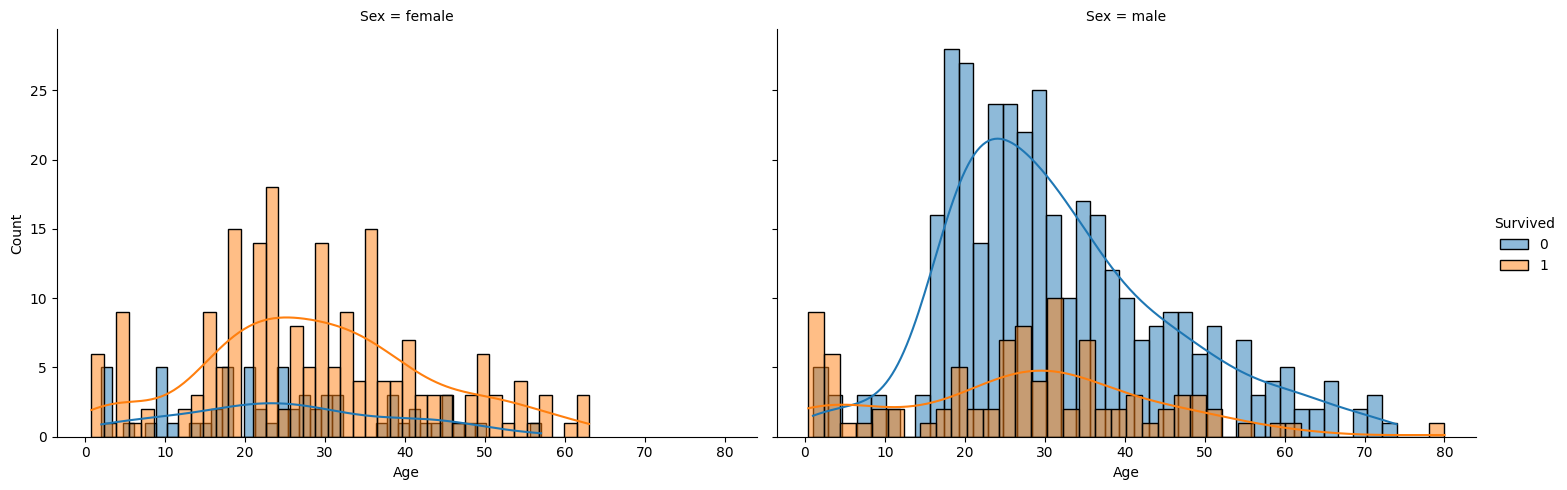

In [32]:
g = sns.FacetGrid(data=train_df, col='Sex', hue='Survived', height=5, aspect=1.5)
g.map(sns.histplot, 'Age', bins=40, kde = True)

g.add_legend()
plt.show()

As a result, most women of all ages have higher survival rates than men. Only male children have high survival 

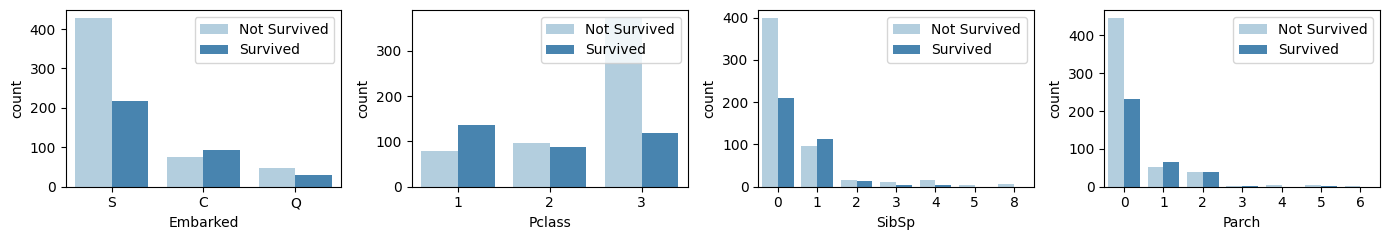

In [43]:
cols = ['Embarked', 'Pclass', 'SibSp', 'Parch']
n_rows = 1
n_cols = 4

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*2.5))

for i in range(n_cols):
    sns.countplot(data=train_df, x=cols[i], hue='Survived', palette='Blues', ax=ax[i])
    ax[i].legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])

plt.tight_layout()
plt.show()

This shows the results of Survival Rate with other columns
  - Most of the people embarkation the Southampton did not survive.
  - Pclass 1 has highest survival rate
  - people with 1-2 family member has better survival rate than 0 sibsp and others
  - people with 0 mostly do not survive


# Fare

In [44]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

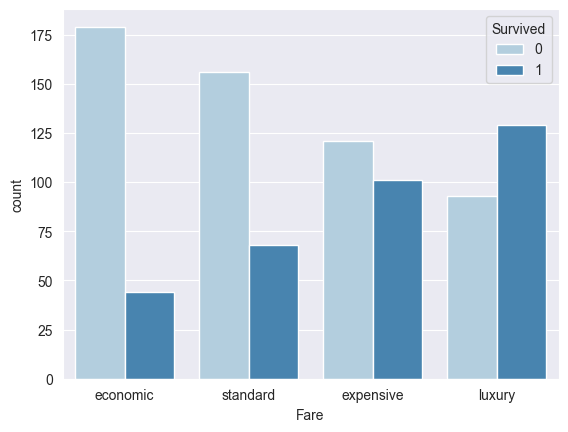

In [172]:
fare_category = ['economic', 'standard', 'expensive', 'luxury']
data = pd.qcut(train_df['Fare'], 4, labels=fare_category)
sns.countplot(x=data, hue=train_df['Survived'], palette='Blues');

Those with premium tickets have the highest survival rate, followed by other ticket types in descending order.

# Data visualization

In [48]:
train_df['Name'].tail()

886                       Montvila, Rev. Juozas
887                Graham, Miss. Margaret Edith
888    Johnston, Miss. Catherine Helen "Carrie"
889                       Behr, Mr. Karl Howell
890                         Dooley, Mr. Patrick
Name: Name, dtype: object

May be signal like Miss, Mr... can make important contributions to the model. So i will create this column

In [173]:
import re
def filler_location(loc):
    result = re.findall(r",([\w\s]+)\.", loc)

    if result:
        return result[0].strip()
    else:
        return None 
train_df['title'] = train_df['Name'].apply(lambda name: filler_location(name))
test_df['title'] = test_df['Name'].apply(lambda name: filler_location(name))

In [161]:
train_df['title'].value_counts()

title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

Because there are so many titles with a count of 1, we need to group them to save space.

In [174]:
def group_title(title):
    if title in ['Mr', 'Miss', 'Mrs', 'Master']:
        return title
    elif title == 'MS':
        return 'Miss'
    else:
        return 'Other'
train_df['title'] = train_df['title'].apply(lambda title:group_title(title))
test_df['title'] = test_df['title'].apply(lambda title:group_title(title))

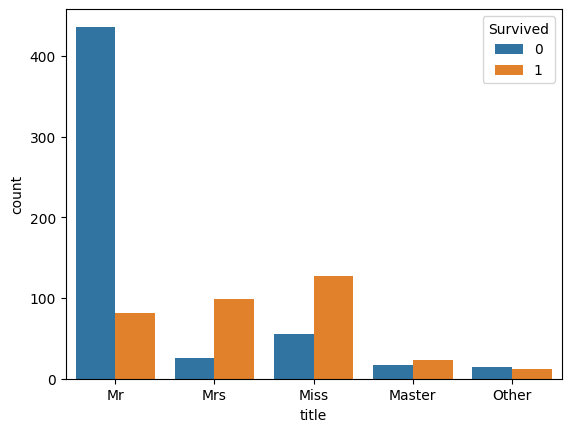

In [62]:
sns.countplot(data=train_df, x='title', hue='Survived');

# Family

In [175]:
train_df['Family_size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1
test_df['Family_size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

In [176]:
train_df['Family_cat'] = pd.cut(train_df['Family_size'], bins=[0, 1, 4, 6, 20], labels=['solo', 'small', 'medium', 'large'])
test_df['Family_cat'] = pd.cut(test_df['Family_size'], bins=[0, 1, 4, 6, 20], labels=['solo', 'small', 'medium', 'large'])

<Axes: xlabel='Family_cat', ylabel='count'>

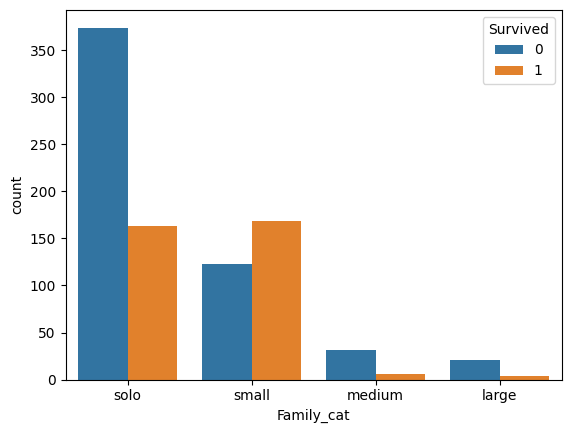

In [66]:
sns.countplot(data=train_df, x='Family_cat', hue='Survived')

The survival rate when traveling alone is very low while traveling with family is more promising.

# Data Wrangling

In [78]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    category
 1   Pclass       891 non-null    category
 2   Name         891 non-null    object  
 3   Sex          891 non-null    category
 4   Age          714 non-null    float64 
 5   SibSp        891 non-null    category
 6   Parch        891 non-null    category
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Cabin        204 non-null    object  
 10  Embarked     889 non-null    object  
 11  title        891 non-null    object  
 12  Family_size  891 non-null    int64   
 13  Family_cat   891 non-null    category
dtypes: category(6), float64(2), int64(1), object(5)
memory usage: 62.3+ KB


In [77]:
print(train_df.isnull().sum()[train_df.isnull().sum()>0])
print(test_df.isnull().sum()[test_df.isnull().sum()>0])

Age         177
Cabin       687
Embarked      2
dtype: int64
Age       86
Fare       1
Cabin    327
dtype: int64


We can see have a lot of missing value is there columns

We need to filling missing value

In [221]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

Embarked has few missing values so removing it has no effect on the model

In [180]:
train_df.dropna(subset=['Embarked'], inplace=True)

We need to split the Cabin and Ticket column into numeric and letter.

In [177]:
def extract_cabin_ticket_info(df):
    # Extract Cabin information
    df['Cabin_Letter'] = df['Cabin'].str.extract(r'([A-Z])')
    df['Cabin_Number'] = df['Cabin'].str.extract(r'(\d+)').astype(float)

    # Extract Ticket information
    df['Ticket_number'] = df['Ticket'].str.extract(r'(\d+)').astype(float)
    df['Ticket_Letter'] = df['Ticket'].str.extract(r'([A-Z])')

    # Drop original Cabin and Ticket columns
    df = df.drop(['Cabin', 'Ticket'], axis=1)
    return df
train_df = extract_cabin_ticket_info(train_df)
test_df = extract_cabin_ticket_info(test_df)

After that filling missing value

In [178]:
def impute_missing_values(df, columns):
    # Create a pipeline for imputing missing values
    pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])
    
    df[columns] = pipeline.fit_transform(df[columns])
    return df
train_df = impute_missing_values(train_df, ['Age', 'Cabin_Letter', 'Ticket_Letter', 'Ticket_number'])
test_df = impute_missing_values(test_df, ['Age', 'Cabin_Letter', 'Ticket_Letter', 'Ticket_number'])


After that we need check answer

In [181]:
knn_imputer = KNNImputer(n_neighbors=10)
train_df[['Cabin_Number', 'Ticket_number']] = knn_imputer.fit_transform(train_df[['Cabin_Number', 'Ticket_number']])
test_df[['Cabin_Number', 'Ticket_number']] = knn_imputer.transform(test_df[['Cabin_Number', 'Ticket_number']])

print(train_df.isnull().sum()[train_df.isnull().sum() > 0])

Series([], dtype: int64)


In [192]:
x = train_df.drop('Survived', axis=1)
y = train_df['Survived']

As above, because we have merged 2 columns SibSp, Parch and Family_size to form Family_cat, I will remove those 2 columns.


We created title column to replace Name column so i will drop name columns too

In [193]:
x = x.drop(columns=['SibSp', 'Parch', 'Family_size', 'Name'], axis=1)
x.head(10)

,Pclass,Sex,Age,Fare,Embarked,title,Family_cat,Cabin_Letter,Cabin_Number,Ticket_number,Ticket_Letter
0,3,male,22.0,7.2500,S,Mr,small,C,37.7,5.0,A
1,1,female,38.0,71.2833,C,Mrs,small,C,85.0,17599.0,P
2,3,female,26.0,7.9250,S,Miss,solo,C,37.7,2.0,S
3,1,female,35.0,53.1000,S,Mrs,small,C,123.0,113803.0,P
4,3,male,35.0,8.0500,S,Mr,solo,C,54.4,373450.0,P
5,3,male,24.0,8.4583,Q,Mr,solo,C,54.4,330877.0,P
6,1,male,54.0,51.8625,S,Mr,solo,E,46.0,17463.0,P
7,3,male,2.0,21.0750,S,Master,medium,C,54.4,349909.0,P
8,3,female,27.0,11.1333,S,Mrs,small,C,54.4,347742.0,P
9,2,female,14.0,30.0708,C,Mrs,small,C,21.6,237736.0,P


In [194]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [198]:
nominal_col = ['Sex', 'Embarked', 'title', 'Cabin_Letter', 'Ticket_Letter']
preprocess = ColumnTransformer(transformers=[
    ('nom_feature', ce.BinaryEncoder(cols=nominal_col), nominal_col),
    ('ord_feature', OrdinalEncoder(), ['Family_cat']),
    ('num_feature', StandardScaler(), ['Pclass', 'Age', 'Fare', 'Cabin_Number', 'Ticket_number'])
], remainder='passthrough')

In [204]:
x_train = preprocess.fit_transform(x_train)
x_test = preprocess.transform(x_test)

Now i use lazyPredict to choice best model

In [205]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)

100%|██████████| 31/31 [00:02<00:00, 10.81it/s]

[LightGBM] [Info] Number of positive: 267, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 525
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375527 -> initscore=-0.508576
[LightGBM] [Info] Start training from score -0.508576
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [206]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.79               0.77     0.77      0.78   
ExtraTreesClassifier               0.78               0.77     0.77      0.78   
ExtraTreeClassifier                0.78               0.77     0.77      0.78   
SVC                                0.78               0.76     0.76      0.77   
LGBMClassifier                     0.77               0.76     0.76      0.77   
KNeighborsClassifier               0.78               0.76     0.76      0.77   
BaggingClassifier                  0.77               0.75     0.75      0.77   
NuSVC                              0.76               0.75     0.75      0.76   
DecisionTreeClassifier             0.76               0.75     0.75      0.76   
LabelPropagation                   0.76               0.74     0.74      0.76   
LabelSpreading              

The performance of the Extra Tree Classifier model is really good and the speed is very fast. So i will choice this

Now i use GridSearchCV to choice best parameters for this model

In [218]:
params = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']  
}


clf = GridSearchCV(
    estimator=ExtraTreeClassifier(random_state=42),
    param_grid=params,
    scoring='precision',  
    cv=6,
    verbose=1,
    n_jobs=-1
)


In [219]:
# Fit GridSearchCV with training data
clf.fit(x_train, y_train)

# Get the best model from GridSearchCV
best_model = clf.best_estimator_

# Retrain the best model on the entire training set
best_model.fit(x_train, y_train)

# Expected on check file
y_pred = best_model.predict(x_test) 

Fitting 6 folds for each of 216 candidates, totalling 1296 fits


In [220]:
for i, j in zip(y_pred, y_test):
    print('prediction {} - reality {}'.format(i, j))

prediction 0 - reality 0
prediction 0 - reality 0
prediction 1 - reality 1
prediction 0 - reality 0
prediction 1 - reality 1
prediction 0 - reality 0
prediction 0 - reality 0
prediction 0 - reality 1
prediction 0 - reality 0
prediction 1 - reality 1
prediction 0 - reality 0
prediction 1 - reality 1
prediction 1 - reality 1
prediction 0 - reality 0
prediction 1 - reality 1
prediction 0 - reality 0
prediction 1 - reality 1
prediction 0 - reality 0
prediction 0 - reality 1
prediction 1 - reality 1
prediction 0 - reality 0
prediction 1 - reality 1
prediction 0 - reality 1
prediction 0 - reality 0
prediction 0 - reality 0
prediction 0 - reality 0
prediction 0 - reality 0
prediction 0 - reality 1
prediction 0 - reality 1
prediction 0 - reality 0
prediction 0 - reality 1
prediction 0 - reality 1
prediction 0 - reality 0
prediction 0 - reality 1
prediction 0 - reality 0
prediction 0 - reality 0
prediction 0 - reality 0
prediction 0 - reality 0
prediction 0 - reality 0
prediction 0 - reality 0


In [222]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.91      0.82       105
           1       0.82      0.55      0.66        73

    accuracy                           0.76       178
   macro avg       0.78      0.73      0.74       178
weighted avg       0.77      0.76      0.75       178

